# Problem Statement
===========================

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 

The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

**Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.**



Attribute Information:
---

The explanations of sensor measurements and their brief statistics are given below.

|Variable| (Abbr.)| Unit| Min| Max| Mean|
|--------|--------|-----|----|----|-----|
|Ambient temperature| (AT)| C| 6.23| 37.10| 17.71|
|Ambient pressure| (AP)| mbar| 985.85| 1036.56| 1013.07|
|Ambient humidity| (AH)| (%)| 24.08| 100.20| 77.87|
|Air filter difference pressure| (AFDP)| mbar| 2.09| 7.61| 3.93|
|Gas turbine exhaust pressure| (GTEP)| mbar| 17.70| 40.72| 25.56|
|Turbine inlet temperature| (TIT)| C| 1000.85| 1100.89| 1081.43|
|Turbine after temperature| (TAT)| C| 511.04| 550.61| 546.16|
|Compressor discharge pressure| (CDP)| mbar| 9.85| 15.16| 12.06|
|Turbine energy yield| (TEY)| MWH| 100.02| 179.50| 133.51|
|Carbon monoxide| (CO)| mg/m3| 0.00| 44.10| 2.37|
|Nitrogen oxides| (NOx)| mg/m3| 25.90| 119.91| 65.29|

#### Import basic Libraries to start with

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#### Import data from CSV using pandas read_csv() method

In [2]:
rawData = pd.read_csv('gas_turbines.csv')
rawData.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


#### Check Data integrity
    -> NO NULL VALUES
    -> NO OBJECT DATATYPES
   
**Data is ready for further processing**

In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


#### Import MinMaxScaler
    Chose to use MinMaxScaler for quick processing of the data in neural network

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
## apply scaler to scale the data

Scale = MinMaxScaler()
Scale.fit(rawData)
Norm_data = Scale.transform(rawData)
Norm_data

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

#### Plotting correlation matrix to check the correlation of the features

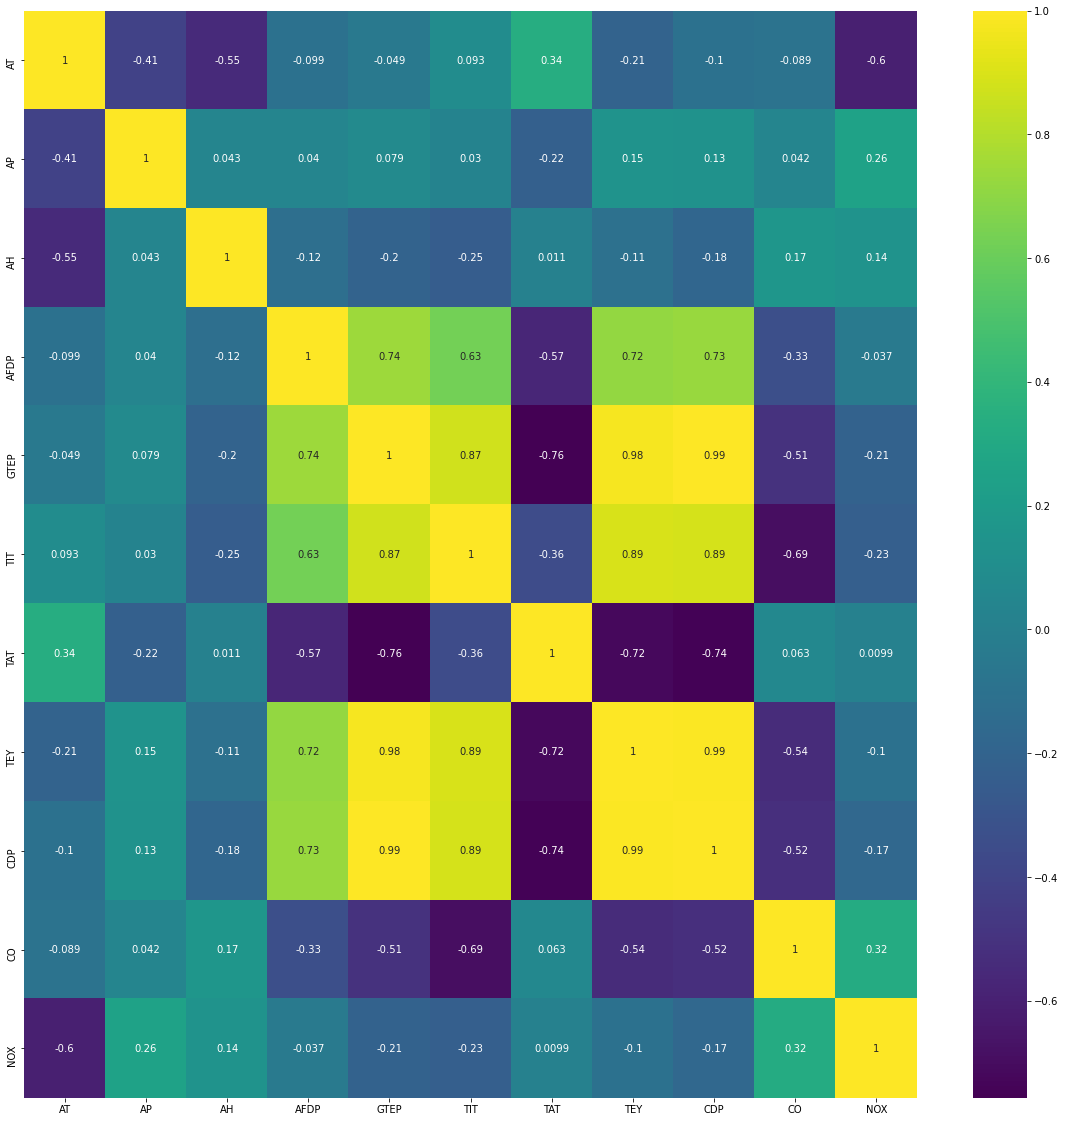

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.DataFrame(Norm_data,columns=rawData.columns).corr(),    vmin=None,
    vmax=None,
    cmap='viridis',
    center=None,
    robust=False,
    annot=True,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None, )
plt.show()

#### Using pair plot to visualize the correlation 

**on the selected variables based on their correlation with TEY**

|Selected Feature|Corr with TEY|
|---------------|----------|
|'AFDP',|0.72|
|'GTEP',|0.98|
|'TIT',|0.89|
|'TAT',|-0.72|
|'CDP',|0.99|
|'CO',|0.54|

*It can also be noted that many of tese features are suffering from multicolinearity issue. let us check using pair plot*

<Figure size 1440x1440 with 0 Axes>

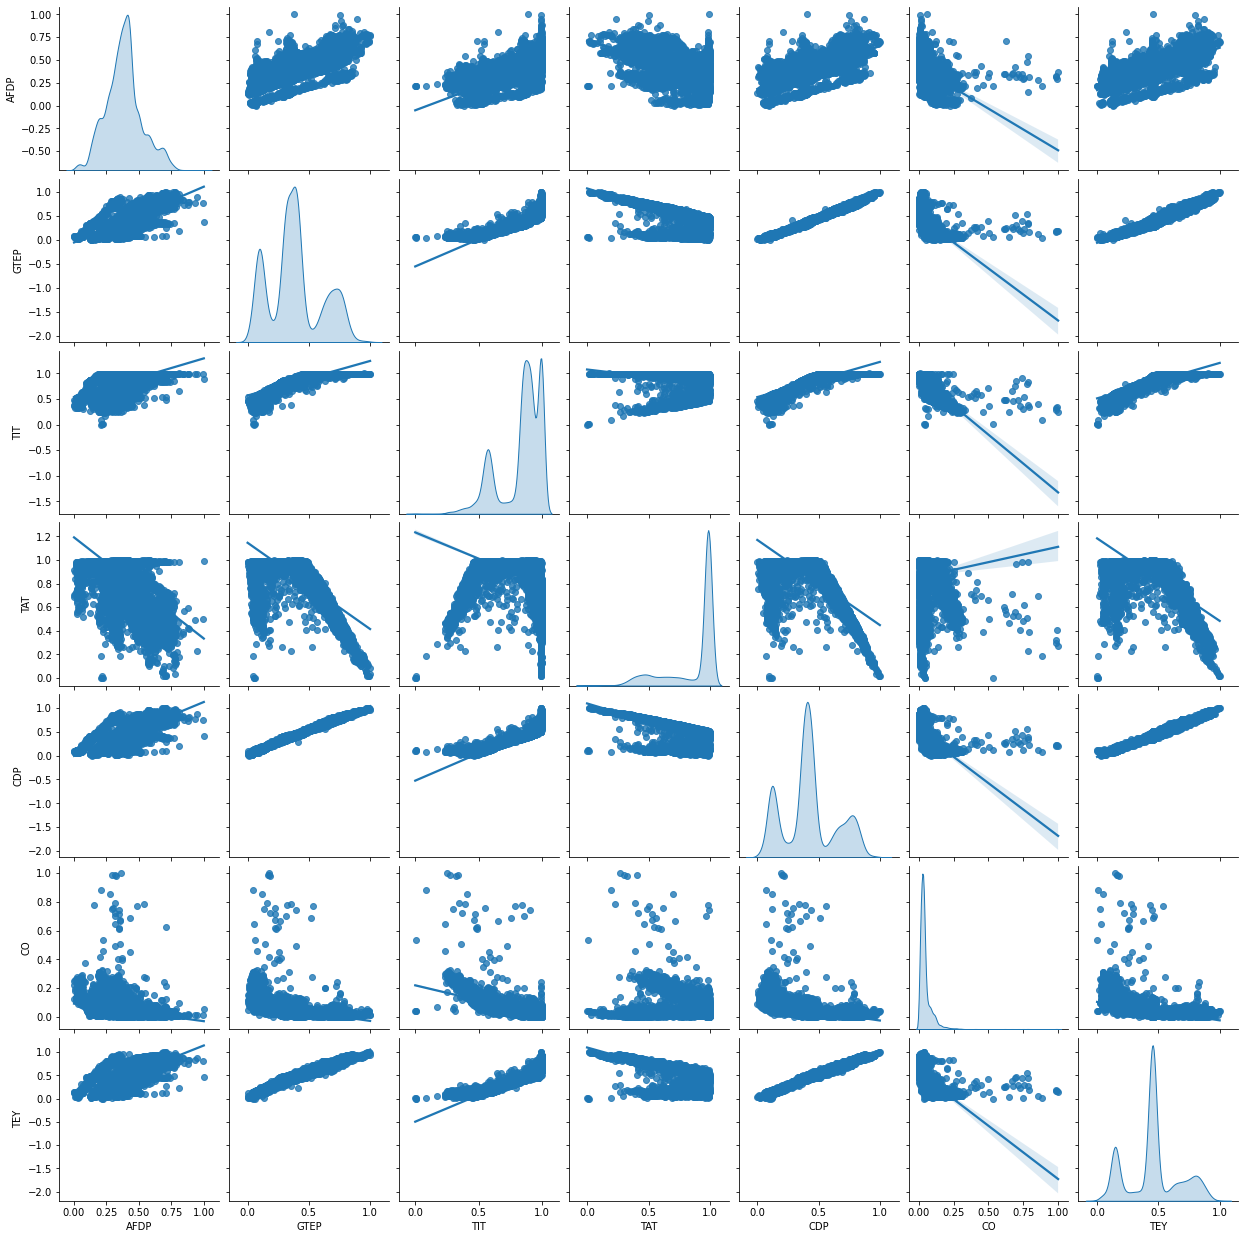

In [131]:
plt.figure(figsize=(20,20))
g = sns.pairplot(pd.DataFrame(Norm_data,columns=rawData.columns),
                 vars= ['AFDP','GTEP','TIT','TAT','CDP','CO','TEY'], kind = 'reg', 
                 diag_kind = 'kde')
# g.map_upper(plt.scatter, color = "White", edgecolor = "Red")
# g.map_upper(corr())
plt.show()

**As we can see the selected features show reasonable correlation with `'TEY'` but also they show colinearlity with each other. example `'CDP'` is highly correlated to `'GTEP'`, infact `'CDP'` Share high correlation with all the selected variable.**

*`Hence it is advisable to select ```CDP``` as our predictor`*

***let us also check using PPSCORE***

#### PPSCORE for FEATURE SELECTION & check non-linear relationship and 

In [52]:
# install ppscore if it is not installed already
# !pip install ppscore

# import ppscore
import ppscore

#### PPSCORE for each variable with respect to ``'TEY'`` 

In [53]:
PPS = ppscore.matrix(rawData,sorted=True)
PPS[PPS.y == 'TEY']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
7,TEY,TEY,1.000000,predict_itself,True,None,0.000000,1.000000,None
12,CDP,TEY,0.872285,regression,True,mean absolute error,11.172076,1.426840,DecisionTreeRegressor()
15,GTEP,TEY,0.832336,regression,True,mean absolute error,11.172076,1.873154,DecisionTreeRegressor()
21,TIT,TEY,0.766040,regression,True,mean absolute error,11.172076,2.613821,DecisionTreeRegressor()
35,TAT,TEY,0.226050,regression,True,mean absolute error,11.172076,8.646631,DecisionTreeRegressor()
43,AFDP,TEY,0.152509,regression,True,mean absolute error,11.172076,9.468234,DecisionTreeRegressor()
54,CO,TEY,0.055869,regression,True,mean absolute error,11.172076,10.547906,DecisionTreeRegressor()
65,AT,TEY,0.000000,regression,True,mean absolute error,11.172076,16.007470,DecisionTreeRegressor()
74,AP,TEY,0.000000,regression,True,mean absolute error,11.172076,12.475617,DecisionTreeRegressor()
83,AH,TEY,0.000000,regression,True,mean absolute error,11.172076,16.950976,DecisionTreeRegressor()


***
**PPSCORE predicts `'CDP'` and `'GTEP'` best predictors of `'TEY'` with very low `mean absolute error`**

**We can also note from below that `'CDP & GTEP'` are good predictors of each other. which proves the `problem of multicolinearity`**

*let us see that by filtering the PPSCORE greater than .5 but less than 1*
***

#### PPSCORE for colinearity - ppscore above .5 and less than 1

In [55]:
PPS[(PPS.ppscore < 1) & (PPS.ppscore >.5)]

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
11,CDP,GTEP,0.876354,regression,True,mean absolute error,3.234287,0.399905,DecisionTreeRegressor()
12,CDP,TEY,0.872285,regression,True,mean absolute error,11.172076,1.426840,DecisionTreeRegressor()
13,GTEP,CDP,0.871523,regression,True,mean absolute error,0.830557,0.106707,DecisionTreeRegressor()
14,TEY,CDP,0.836133,regression,True,mean absolute error,0.830557,0.136101,DecisionTreeRegressor()
15,GTEP,TEY,0.832336,regression,True,mean absolute error,11.172076,1.873154,DecisionTreeRegressor()
16,CDP,TIT,0.822381,regression,True,mean absolute error,12.122180,2.153124,DecisionTreeRegressor()
17,GTEP,TIT,0.820955,regression,True,mean absolute error,12.122180,2.170413,DecisionTreeRegressor()
18,TIT,GTEP,0.817373,regression,True,mean absolute error,3.234287,0.590667,DecisionTreeRegressor()
19,TIT,CDP,0.810509,regression,True,mean absolute error,0.830557,0.157383,DecisionTreeRegressor()
20,TEY,GTEP,0.789650,regression,True,mean absolute error,3.234287,0.680332,DecisionTreeRegressor()


***
**Based on correlation scores and PPSCORES we select `'CDP'` as our lone predictor or `'TEY'`.**
***

### Separating X and Y for further processing

In [10]:
y = Norm_data[:,7:8]
y

array([[0.19519076],
       [0.19545943],
       [0.19532509],
       ...,
       [0.13460505],
       [0.14199355],
       [0.15327781]])

In [81]:
X = pd.DataFrame(Norm_data,columns=rawData.columns)#.values
# X = pd.DataFrame(zip(X.CDP,X.GTEP),columns=['CDP','GTEP'])
X = pd.DataFrame(X.CDP,columns=['CDP']).values
X.shape

(15039, 1)

#### Train Test Split for test and validation

In [12]:
from sklearn.model_selection import train_test_split

In [83]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = .33, random_state = 42)
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((10076, 1), (4963, 1), (10076, 1), (4963, 1))

### MODEL BUILDING WITH ALL RANDOM VALUES (HYPER PARAMETERS)

    The stages in building a ANN (Artificial Neural Networks) are as follows
        
1. Initiate a model object :- We are using ````Sequential model```` for our NN, 
                                      with ``2 Hidden layers``, and ``relu`` as activation function.
                                      and neurons ``32``,``16`` for hidden layers
2. Compile the model       :- We use `loss = 'mean_absolute_error'`, `optimizer = 'adam'` and 
                              `metric = 'mse'`
3. Train model using fit() :- We use `batch_size = 40`,`validation_batch_size = 0.33`, 
                              `epochs = 200`, `verbose = 1` as our parameters
4. Evaluate model          :- evaluate using Xtrain and ytrain

In [14]:
# IMPORT ALL NECESSARY LIBRARIES, METHODS, FUNCTIONS ETC

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from keras.optimizers import Adam,RMSprop
from keras.layers import Dropout

In [15]:
# INITIALIZE THE SEQUENTIAL MODEL (NEURAL NETWORK)

model = Sequential()
model.add(Dense(32, input_dim=1,  activation='relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

In [16]:
# COMPILE THE MODEL WITH RELEVANT PARAMETERS

model.compile(optimizer=RMSprop(),
              loss='mse',
              metrics='mean_absolute_error',
              loss_weights=None,
              weighted_metrics=None,
              run_eagerly=None,
              steps_per_execution=None,)

In [17]:
# Train the random model with Xtrain and Xtest

model.fit(Xtrain,ytrain,batch_size=40,validation_batch_size=.33,epochs=200,verbose = 1)

Epoch 1/200
252/252 [==============================] - 11s 1ms/step - loss: 0.0201 - mean_absolute_error: 0.0883
Epoch 2/200
252/252 [==============================] - 0s 987us/step - loss: 0.0010 - mean_absolute_error: 0.0260
Epoch 3/200
252/252 [==============================] - 0s 1ms/step - loss: 0.0010 - mean_absolute_error: 0.0258
Epoch 4/200
252/252 [==============================] - 0s 1ms/step - loss: 9.9052e-04 - mean_absolute_error: 0.0256
Epoch 5/200
252/252 [==============================] - 0s 1ms/step - loss: 9.9175e-04 - mean_absolute_error: 0.0256
Epoch 6/200
252/252 [==============================] - 0s 1ms/step - loss: 9.7963e-04 - mean_absolute_error: 0.0254
Epoch 7/200
252/252 [==============================] - 0s 1ms/step - loss: 9.7837e-04 - mean_absolute_error: 0.0253
Epoch 8/200
252/252 [==============================] - 0s 1ms/step - loss: 9.7825e-04 - mean_absolute_error: 0.0254
Epoch 9/200
252/252 [==============================] - 0s 1ms/step - loss: 9.5499

252/252 [==============================] - 0s 1ms/step - loss: 5.5843e-04 - mean_absolute_error: 0.0166
Epoch 140/200
252/252 [==============================] - 0s 1ms/step - loss: 5.7192e-04 - mean_absolute_error: 0.0168
Epoch 141/200
252/252 [==============================] - 0s 1ms/step - loss: 5.5959e-04 - mean_absolute_error: 0.0166
Epoch 142/200
252/252 [==============================] - 0s 1ms/step - loss: 5.3798e-04 - mean_absolute_error: 0.0163
Epoch 143/200
252/252 [==============================] - 0s 987us/step - loss: 5.5716e-04 - mean_absolute_error: 0.0166
Epoch 144/200
252/252 [==============================] - 0s 1ms/step - loss: 5.2282e-04 - mean_absolute_error: 0.0161
Epoch 145/200
252/252 [==============================] - 0s 1ms/step - loss: 5.5265e-04 - mean_absolute_error: 0.0166
Epoch 146/200
252/252 [==============================] - 0s 989us/step - loss: 5.4759e-04 - mean_absolute_error: 0.0166
Epoch 147/200
252/252 [==============================] - 0s 992us/

In [18]:
# Evaluate model
scores = model.evaluate(Xtrain, ytrain)
print("%s: %.2f" % (model.metrics_names[1], scores[1]))

315/315 [==============================] - 1s 797us/step - loss: 5.9959e-04 - mean_absolute_error: 0.0176
mean_absolute_error: 0.02


In [19]:
# model.evaluate(Xtrain, ytrain)

### Hyperparameter Tuning using Gridsearch CV

To manage the compuational load on the system we shall do the Hyperparameter tuning using only one activation function for each iteration. We shall keep all other parameters constant to keep the results comparable for each function. we shall choose the function with highest accuracy along with selected parameters for final model

#### Hyperparameter tuning using `'LeakyReLU'`

In [23]:
# def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2): #neuron3
#     model = Sequential()
#     model.add(Dense(neuron1,input_dim = 1,kernel_initializer = init,activation = activation_function))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(1,activation = activation_function))
    
#     adam = Adam(learning_rate = learning_rate)
#     model.compile(loss = 'mean_squared_error',optimizer = adam, metrics = ['mse'])
#     return model

# # Create the model

# model = KerasRegressor(build_fn = create_model,verbose = 0)

# # Define the grid search parameters

# batch_size = [10,20,40]
# epochs = [50,100]
# learning_rate = [0.01,0.1]
# dropout_rate = [0.01,0.1]
# activation_function = ['LeakyReLU',]
# init = ['uniform','normal','zero']
# neuron1 = [32,64]
# neuron2 = [16,32]
# # neuron3 = [2,4]

# # Make a dictionary of the grid search parameters

# param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
#                    activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2) #,neuron3=neuron3

# # Build and fit the GridSearchCV

# grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(n_splits=2),verbose = 1,n_jobs=-1)
# grid_result = grid.fit(Xtrain,ytrain)

Fitting 2 folds for each of 288 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 62.2min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed: 75.3min finished


In [24]:
# # Summarize the results

# print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#   print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.0005721235065720975, using {'activation_function': 'LeakyReLU', 'batch_size': 40, 'dropout_rate': 0.01, 'epochs': 100, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 64, 'neuron2': 16}
-0.0007478918414562941,2.200633753091097e-05 with: {'activation_function': 'LeakyReLU', 'batch_size': 10, 'dropout_rate': 0.01, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 32, 'neuron2': 16}
-0.0008878627559170127,0.00023276102729141712 with: {'activation_function': 'LeakyReLU', 'batch_size': 10, 'dropout_rate': 0.01, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 32, 'neuron2': 32}
-0.0009827402245718986,9.09215013962239e-05 with: {'activation_function': 'LeakyReLU', 'batch_size': 10, 'dropout_rate': 0.01, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 64, 'neuron2': 16}
-0.0011832285090349615,0.00013680459233000875 with: {'activation_function': 'LeakyReLU', 'batch_size': 10, 'dropout_rate': 0.01, 'epochs': 50, 'init': 'unifo

#### Hyperparameter tuning using `'Linear'`

In [25]:
# def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2): #neuron3
#     model = Sequential()
#     model.add(Dense(neuron1,input_dim = 1,kernel_initializer = init,activation = activation_function))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(1,activation = activation_function))
    
#     adam = Adam(learning_rate = learning_rate)
#     model.compile(loss = 'mean_squared_error',optimizer = adam, metrics = ['mse'])
#     return model

# # Create the model

# model = KerasRegressor(build_fn = create_model,verbose = 0)

# # Define the grid search parameters

# batch_size = [10,20,40]
# epochs = [50,100]
# learning_rate = [0.01,0.1]
# dropout_rate = [0.01,0.1]
# activation_function = ['linear',]
# init = ['uniform','normal','zero']
# neuron1 = [32,64]
# neuron2 = [16,32]
# # neuron3 = [2,4]

# # Make a dictionary of the grid search parameters

# param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
#                    activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2) #,neuron3=neuron3

# # Build and fit the GridSearchCV

# grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(n_splits=2),verbose = 1,n_jobs=-1)
# grid_result = grid.fit(Xtrain,ytrain)

Fitting 2 folds for each of 288 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 50.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 74.0min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed: 82.8min finished


In [26]:
# # Summarize the results
# print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best : -0.0010812851251102984, using {'activation_function': 'linear', 'batch_size': 40, 'dropout_rate': 0.01, 'epochs': 100, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 32, 'neuron2': 32}


***
**`'LeakyReLU'` has better mean test score than the `'linear'` activation function (given all other parameters same). Hence, we select `'LeakyReLU'` as our activatin function along with all the selected parameters in Gridsearch CV.**
***
#### Selected Parameters

|parameter name:|selected Parameter|
|---------|------------------|
|'activation_function':| 'LeakyReLU',| 
|'batch_size':| 40, |
|'dropout_rate':| 0.01, |
|'epochs':| 100, |
|'init':| 'uniform', |
|'learning_rate':| 0.01, |
|'neuron1':| 64, |
|'neuron2':| 16|

**

### Final Model using the selected parameters in Gridsearch
**

In [41]:
# Defining selected parameters

adam = Adam(learning_rate = learning_rate)
batch_size = 40
epochs = 100
learning_rate = [0.01]
dropout_rate = 0.01
activation_function = 'LeakyReLU'
init = 'uniform'
neuron1 = 64
neuron2 = 16

In [42]:
# Initiate the Sequential model with two hiden layers

model = Sequential()
model.add(Dense(neuron1,input_dim = 1,kernel_initializer = init,activation = activation_function))
model.add(Dropout(dropout_rate))
model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
model.add(Dropout(dropout_rate))
model.add(Dense(1,activation = activation_function))

In [43]:
# Compile the model with selected parameters

model.compile(loss = 'mean_squared_error',optimizer = adam, metrics = ['mse'])

In [84]:
# Train the model

model.fit(Xtrain, ytrain, batch_size=batch_size, validation_batch_size=.33, epochs=epochs, verbose = 1)

Epoch 1/100
252/252 [==============================] - 1s 2ms/step - loss: 7.2863e-04 - mse: 7.2863e-04
Epoch 2/100
252/252 [==============================] - 0s 2ms/step - loss: 8.5673e-04 - mse: 8.5673e-04
Epoch 3/100
252/252 [==============================] - 0s 2ms/step - loss: 8.0537e-04 - mse: 8.0537e-04
Epoch 4/100
252/252 [==============================] - 0s 2ms/step - loss: 7.7646e-04 - mse: 7.7646e-04
Epoch 5/100
252/252 [==============================] - 0s 2ms/step - loss: 7.0928e-04 - mse: 7.0928e-04
Epoch 6/100
252/252 [==============================] - 0s 2ms/step - loss: 7.8760e-04 - mse: 7.8760e-04
Epoch 7/100
252/252 [==============================] - 0s 2ms/step - loss: 7.4991e-04 - mse: 7.4991e-04
Epoch 8/100
252/252 [==============================] - 0s 2ms/step - loss: 7.4738e-04 - mse: 7.4738e-04
Epoch 9/100
252/252 [==============================] - 0s 2ms/step - loss: 7.8265e-04 - mse: 7.8265e-04
Epoch 10/100
252/252 [==============================] - 0s 2ms/s

252/252 [==============================] - 0s 2ms/step - loss: 7.8366e-04 - mse: 7.8366e-04
Epoch 80/100
252/252 [==============================] - 0s 1ms/step - loss: 7.7072e-04 - mse: 7.7072e-04
Epoch 81/100
252/252 [==============================] - 0s 1ms/step - loss: 7.3256e-04 - mse: 7.3256e-04
Epoch 82/100
252/252 [==============================] - 0s 1ms/step - loss: 7.2531e-04 - mse: 7.2531e-04
Epoch 83/100
252/252 [==============================] - 0s 1ms/step - loss: 7.5500e-04 - mse: 7.5500e-04
Epoch 84/100
252/252 [==============================] - 0s 1ms/step - loss: 7.4411e-04 - mse: 7.4411e-04
Epoch 85/100
252/252 [==============================] - 0s 1ms/step - loss: 8.0012e-04 - mse: 8.0012e-04
Epoch 86/100
252/252 [==============================] - 0s 1ms/step - loss: 7.4723e-04 - mse: 7.4723e-04
Epoch 87/100
252/252 [==============================] - 0s 1ms/step - loss: 7.2188e-04 - mse: 7.2188e-04
Epoch 88/100
252/252 [==============================] - 0s 1ms/step 

In [85]:
# Evaluate the model on train dataset

model.evaluate(Xtrain,ytrain)

315/315 [==============================] - 1s 1ms/step - loss: 8.8949e-04 - mse: 8.8949e-04


[0.0008894872153177857, 0.0008894872153177857]

In [86]:
# Evaluate the mode on the test Dataset
model.evaluate(Xtest,ytest)

156/156 [==============================] - 0s 1ms/step - loss: 8.3867e-04 - mse: 8.3867e-04


[0.0008386719273403287, 0.0008386719273403287]

In [87]:
# Predict using Test data

predict = model.predict(Xtest)
print(predict.flatten())
print(ytest)

[0.446316   0.19628291 0.44205576 ... 0.44223902 0.435276   0.43999436]
[[0.46063944]
 [0.1573079 ]
 [0.45069855]
 ...
 [0.45190758]
 [0.44545943]
 [0.45204191]]


In [99]:
# Creating a reorganised data from on the raw data to rework the MinMaxScaler for inverse Scale operations

rawData1 = pd.concat([rawData.drop('TEY',axis=1),rawData.TEY],axis=1)
# rawData1

In [95]:
# Initiating a scaler object for Y data for inverse scale operations

y_scaler = MinMaxScaler()
dataY = y_scaler.fit_transform(rawData1.iloc[:,-1:])
dataY

array([[0.19519076],
       [0.19545943],
       [0.19532509],
       ...,
       [0.13460505],
       [0.14199355],
       [0.15327781]])

In [98]:
# Testing the inverse scale operation on predicted data
y_scaler.inverse_transform(predict)

array([[133.39375],
       [114.7813 ],
       [133.07663],
       ...,
       [133.09027],
       [132.57195],
       [132.92319]], dtype=float32)

In [113]:
# Final dataframe Showing the `X`, `y`, `y^hat`, `actual y^hat`

pd.DataFrame(zip(Xtest,ytest,predict,y_scaler.inverse_transform(predict)),
             columns=['X','Y','Y^hat','actual y^hat'])

,X,Y,Y^hat,actual y^hat
0,[0.447127458177182],[0.46063944116066624],[0.446316],[133.39375]
1,[0.17127071823204387],[0.1573078989790433],[0.19628291],[114.7813]
2,[0.4291619982227717],[0.45069854916711427],[0.44205576],[133.07663]
3,[0.4469342811884247],[0.4516389038151529],[0.4462702],[133.39035]
4,[0.10848819688598654],[0.14239656098871545],[0.13279809],[110.0555]
...,...,...,...,...
4958,[0.5305799173202486],[0.646023643202579],[0.52007884],[138.88467]
4959,[0.9063091604528064],[0.9180548092423426],[0.9025085],[167.35274]
4960,[0.42993470617780005],[0.4519075765717355],[0.44223902],[133.09027]
4961,[0.400571803886721],[0.445459430413756],[0.435276],[132.57195]


In [109]:
# Train Test splits on rawdata / original data for comparison perposes - random_state is 42 same as before

X_train,X_test,y_train,y_test = train_test_split(rawData1.iloc[:,:-1],rawData1.iloc[:,-1:],
                                                 test_size = .33,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10076, 10), (4963, 10), (10076, 1), (4963, 1))

In [115]:
## Final dataframe displaying scaled and actual data along side predicted data for comparison.

actual_vs_predict = pd.DataFrame(zip(ytest,predict,y_test.values,y_scaler.inverse_transform(predict)),
                                 columns=['scaled_ytest','scaled y^hat','actual_TEY','Predicted_TEY'])
actual_vs_predict.head(10)

,scaled_ytest,scaled y^hat,actual_TEY,Predicted_TEY
0,[0.46063944116066624],[0.446316],[134.46],[133.39375]
1,[0.1573078989790433],[0.19628291],[111.88],[114.7813]
2,[0.45069854916711427],[0.44205576],[133.72],[133.07663]
3,[0.4516389038151529],[0.4462702],[133.79],[133.39035]
4,[0.14239656098871545],[0.13279809],[110.77],[110.0555]
5,[0.17665233745298203],[0.1636616],[113.32],[112.35297]
6,[0.45137023105857055],[0.440315],[133.77],[132.94705]
7,[0.3870231058570659],[0.34413305],[128.98],[125.78727]
8,[0.7959430413756041],[0.7796246],[159.42],[158.20525]
9,[0.8287211176786675],[0.75819355],[161.86],[156.60992]


In [118]:
# Calculating error on predicted value

Error = actual_vs_predict.actual_TEY - actual_vs_predict.Predicted_TEY

In [128]:
# Calculating RMSE on Actual predicted Y 
RMSE = np.sqrt(np.sum(Error**2)/Error.shape)
RMSE

array([2.15576985])

# Conclusion

We Sucessfully built a Neural Networks model for predicting the Turbine Energy Yield with RMSE of 2.15.

It was wonderful experience learning the Neural networks. 